In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import plotly_express as px
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

url = 'https://raw.githubusercontent.com/danielmoore19/baseball/master/baseballdatabank-2019.2/core/Batting.csv'
data = pd.read_csv(url)
data.tail(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
105851,zagurmi01,2018,1,MIL,NL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105852,zamorda01,2018,1,NYN,NL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105853,zastrro01,2018,1,CHN,NL,6,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105854,zieglbr01,2018,1,MIA,NL,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105855,zieglbr01,2018,2,ARI,NL,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
105856,zimmebr01,2018,1,CLE,AL,34,106,14,24,5,0,2,9.0,4.0,1.0,7,44.0,0.0,1.0,0.0,0.0,1.0
105857,zimmejo02,2018,1,DET,AL,25,2,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
105858,zimmery01,2018,1,WAS,NL,85,288,33,76,21,2,13,51.0,1.0,1.0,30,55.0,1.0,3.0,0.0,2.0,10.0
105859,zobribe01,2018,1,CHN,NL,139,455,67,139,28,3,9,58.0,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0
105860,zuninmi01,2018,1,SEA,AL,113,373,37,75,18,0,20,44.0,0.0,0.0,24,150.0,0.0,6.0,0.0,2.0,7.0


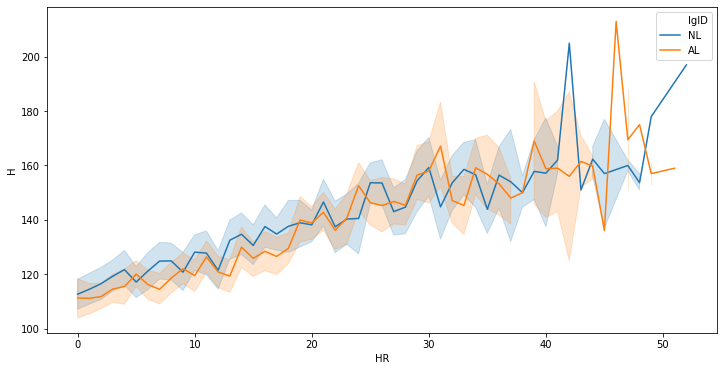

In [17]:
lower_mound = data[(data['yearID'] >= 1968) & (data['yearID'] <= 1991) & (data['AB'] >= 300)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='HR', y='H', hue='lgID', data=lower_mound)
plt.show()

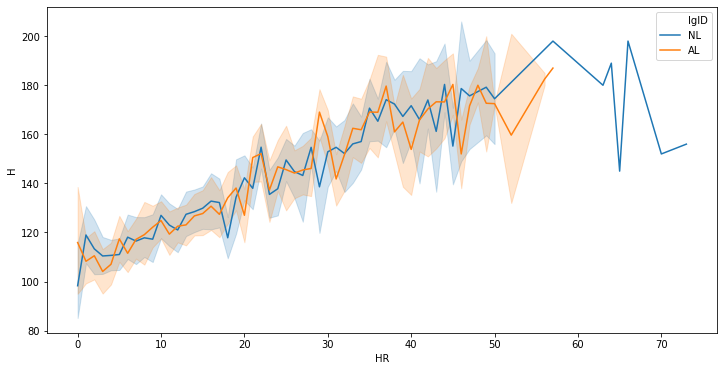

In [18]:
steroid_era = data[(data['yearID'] >= 1992) & (data['yearID'] <= 2003) & (data['AB'] >= 300)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='HR', y='H', hue='lgID', data=steroid_era)
plt.show()

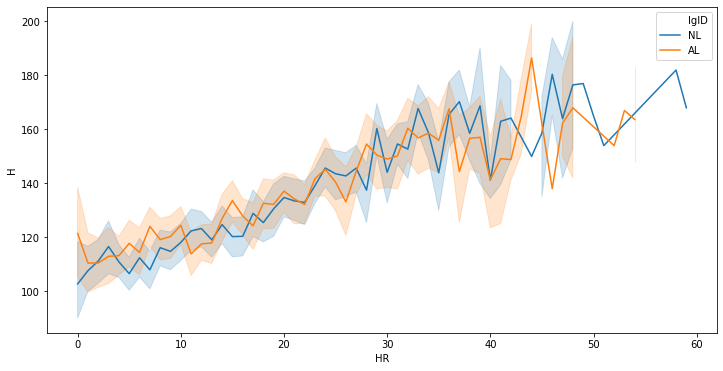

In [19]:
stats_era = data[(data['yearID'] >= 2004) & (data['yearID'] <= 2018) & (data['AB'] >= 300)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='HR', y='H', hue='lgID', data=stats_era)
plt.show()

In [26]:
lower_mound.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.00000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000
mean,1980.393982,1.016939,134.010363,470.572738,62.162814,127.038661,21.406935,3.404344,12.129534,58.246712,10.890793,5.26106,46.871463,67.194101,5.077521,2.809087,3.709247,4.110004,10.517537
std,7.103300,0.129056,19.510797,97.870984,21.448698,33.467903,7.970634,2.781548,9.367455,23.831666,13.733505,4.53283,21.888642,28.332844,4.578700,2.821763,4.128608,2.536608,4.874771
min,1968.000000,1.000000,75.000000,300.000000,16.000000,53.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.00000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,1.000000,120.000000,386.000000,45.000000,99.000000,15.000000,1.000000,5.000000,40.000000,2.000000,2.00000,30.000000,46.000000,2.000000,1.000000,1.000000,2.000000,7.000000
50%,1980.000000,1.000000,137.000000,473.000000,60.000000,125.000000,21.000000,3.000000,10.000000,54.000000,6.000000,4.00000,43.000000,63.000000,4.000000,2.000000,2.000000,4.000000,10.000000
75%,1987.000000,1.000000,151.000000,552.000000,77.000000,152.000000,26.000000,5.000000,18.000000,74.000000,15.000000,7.00000,59.000000,83.000000,7.000000,4.000000,5.000000,6.000000,13.000000
max,1992.000000,2.000000,163.000000,705.000000,146.000000,240.000000,54.000000,21.000000,52.000000,149.000000,130.000000,42.00000,148.000000,189.000000,45.000000,50.000000,40.000000,18.000000,36.000000


In [27]:
steroid_era.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,1998.206785,1.010501,130.965670,468.587237,70.593296,131.252019,25.691842,2.825121,16.339257,67.430533,10.149838,4.357027,49.502423,80.186995,4.323102,4.639742,2.632472,4.316236,10.749192
std,3.137787,0.105843,21.276839,97.760842,24.048801,33.987940,8.904383,2.485292,11.277277,27.905910,11.546995,3.775968,24.306436,29.688364,4.994523,4.141373,3.482339,2.607943,4.863023
min,1993.000000,1.000000,71.000000,300.000000,20.000000,55.000000,5.000000,0.000000,0.000000,16.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,1.000000,113.000000,384.000000,52.000000,104.000000,19.000000,1.000000,8.000000,46.000000,2.000000,2.000000,31.000000,59.000000,1.000000,2.000000,0.000000,2.000000,7.000000
50%,1998.000000,1.000000,134.000000,472.000000,68.000000,130.000000,25.000000,2.000000,14.000000,62.000000,6.000000,3.000000,45.000000,77.000000,3.000000,4.000000,1.000000,4.000000,10.000000
75%,2001.000000,1.000000,150.000000,550.000000,87.000000,156.000000,31.250000,4.000000,23.000000,86.000000,14.000000,6.000000,63.000000,98.000000,6.000000,6.000000,4.000000,6.000000,14.000000
max,2003.000000,3.000000,163.000000,696.000000,152.000000,242.000000,59.000000,21.000000,73.000000,165.000000,75.000000,24.000000,198.000000,188.000000,68.000000,34.000000,25.000000,17.000000,32.000000


In [28]:
stats_era.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,3640.000000,3640.000000,3640.000000,3640.00000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000,3640.000000
mean,2010.956319,1.002473,132.040110,472.12033,66.028297,128.229396,25.756044,2.633242,16.045330,63.234890,8.682143,3.210714,45.798626,92.731593,3.714011,4.881319,1.934066,3.868681,10.835165
std,4.346937,0.049670,21.215691,99.32762,21.680257,33.825017,8.787394,2.617367,9.869324,24.150293,10.492506,3.153287,21.492954,33.740254,4.761163,4.013399,2.995929,2.337504,5.307916
min,2004.000000,1.000000,73.000000,300.00000,17.000000,50.000000,5.000000,0.000000,0.000000,8.000000,0.000000,0.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,1.000000,115.000000,386.00000,49.000000,100.000000,19.000000,1.000000,8.000000,45.000000,2.000000,1.000000,30.000000,68.000000,1.000000,2.000000,0.000000,2.000000,7.000000
50%,2011.000000,1.000000,136.000000,475.00000,64.000000,126.000000,25.000000,2.000000,14.000000,60.000000,5.000000,2.000000,42.000000,90.000000,2.000000,4.000000,1.000000,4.000000,10.000000
75%,2015.000000,1.000000,150.000000,557.00000,81.000000,154.000000,32.000000,4.000000,22.000000,79.000000,12.000000,5.000000,57.000000,114.000000,5.000000,7.000000,3.000000,5.000000,14.000000
max,2018.000000,2.000000,163.000000,716.00000,143.000000,262.000000,56.000000,23.000000,59.000000,156.000000,78.000000,24.000000,232.000000,223.000000,120.000000,30.000000,24.000000,16.000000,32.000000


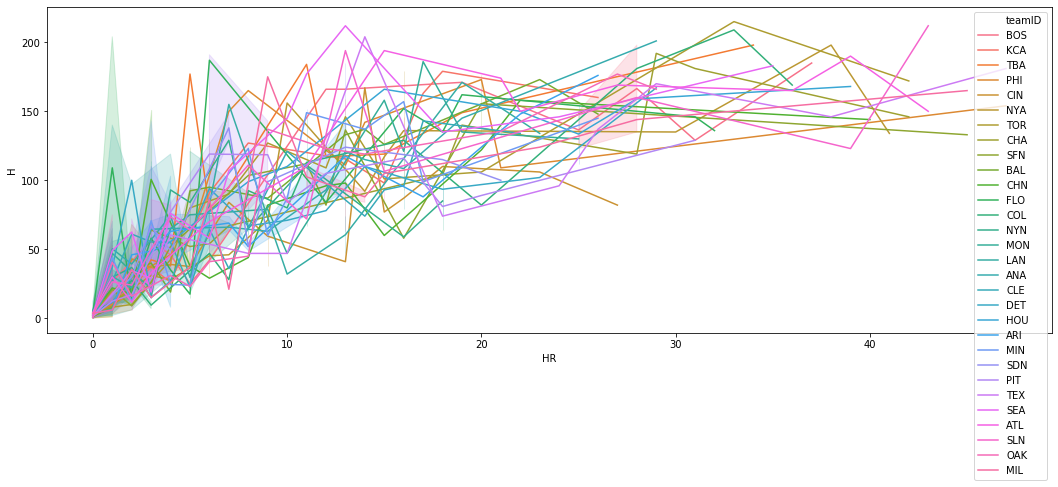

In [46]:
year03 = data[(data['yearID'] == 2003)]

plt.figure(figsize=(18, 6))
sns.lineplot(x='HR', y='H', hue='teamID', data=year03)
plt.show()

In [45]:
teams = year03.groupby('teamID')
plt.figure(figsize=(18, 6))
sns.lineplot(x='HR', y='H', hue='teamID', data=teams)
plt.show()

AttributeError: Cannot access callable attribute 'get' of 'DataFrameGroupBy' objects, try using the 'apply' method

<Figure size 1296x432 with 0 Axes>

In [50]:
agg_by_team = data[data['yearID'] == 2000][['H', 'HR', 'teamID']]
#.groupby('teamID').sum().reset_index()
print(agg_by_team)
#sns.scatterplot(x='H', y='HR', hue='teamID', data=agg_by_team)
#plt.show()

         H  HR teamID
79266   59   3    CHA
79267   34   6    NYN
79268    2   0    SEA
79269  182  25    PHI
79270    0   0    MIL
...    ...  ..    ...
80645    0   0    SFN
80646    0   0    TEX
80647    0   0    OAK
80648    0   0    HOU
80649   20   3    CHN

[1384 rows x 3 columns]


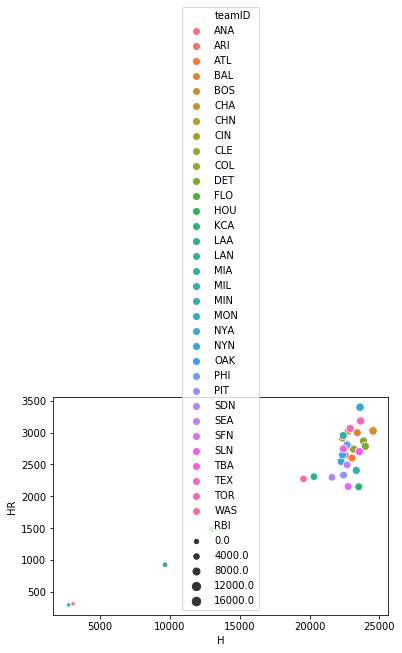

In [57]:
yr_2000 = data.loc[data['yearID'] >= 2003, ['H', 'HR', 'teamID', 'RBI']]
yr_2000_agg = yr_2000.groupby('teamID').sum().reset_index()

sns.scatterplot(x='H', y='HR', size='RBI', hue='teamID', data=yr_2000_agg)
plt.show()

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
%matplotlib inline

url = 'https://raw.githubusercontent.com/danielmoore19/baseball/master/baseballdatabank-2019.2/core/Batting.csv'
data = pd.read_csv(url)
data.head()

col_subset = data[['H', 'HR', 'RBI', 'teamID', 'yearID']]
agg = col_subset.groupby(['teamID', 'yearID']).sum().reset_index()

agg = agg.sort_values('yearID')
agg = agg[agg['yearID'] > 2000]

px.scatter(agg, x='H', y='HR', color='teamID', animation_frame='yearID')

In [6]:
import plotly_express as px
import sys

print(sys.version)
print(px.__version__)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
0.4.1
